In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

# env XLA_FLAGS=--xla_force_host_platform_device_count=12 python foo.py
os.environ['XLA_FLAGS'] = f'--xla_force_host_platform_device_count={os.cpu_count()}'

import jax
jax.config.update('jax_platform_name', 'cpu')
jax.devices()

I0000 00:00:1712414281.143074  614490 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


[CpuDevice(id=0),
 CpuDevice(id=1),
 CpuDevice(id=2),
 CpuDevice(id=3),
 CpuDevice(id=4),
 CpuDevice(id=5),
 CpuDevice(id=6),
 CpuDevice(id=7),
 CpuDevice(id=8),
 CpuDevice(id=9),
 CpuDevice(id=10),
 CpuDevice(id=11),
 CpuDevice(id=12),
 CpuDevice(id=13),
 CpuDevice(id=14),
 CpuDevice(id=15),
 CpuDevice(id=16),
 CpuDevice(id=17),
 CpuDevice(id=18),
 CpuDevice(id=19),
 CpuDevice(id=20),
 CpuDevice(id=21),
 CpuDevice(id=22),
 CpuDevice(id=23)]

In [3]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.mucsvss_model import MUCSVSSModel

# 1. Read data

In [8]:
df_inflation = read_inflation(mergeable_format=True).reset_index().pipe(lambda x: x[x["country"].isin(["United States", "Netherlands", "Germany", "Belgium"])])
df_inflation

,country,date,inflation
20,Netherlands,1970-04-01,0.014768
23,Germany,1970-04-01,0.008881
27,Belgium,1970-04-01,0.005236
28,United States,1970-04-01,0.016667
43,Germany,1970-07-01,0.001468
...,...,...,...
7377,United States,2022-10-01,0.003669
7388,United States,2023-01-01,0.010452
7392,Germany,2023-01-01,0.015273
7394,Belgium,2023-01-01,-0.003628


# 2. Model

In [9]:
model = MUCSVSSModel(
    num_particles=100008, stochastic_seasonality=True
)
model.load_from_disk("../../models/mucsvss_model_100008_stochastic_United States,Netherlands,Germany,Belgium.pkl")

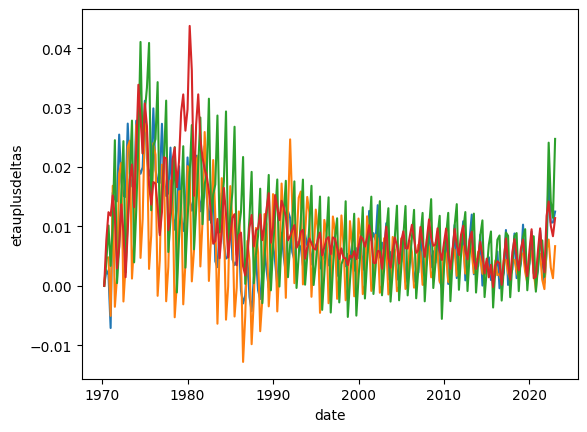

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# color is country
sns.lineplot(data = model.stored_state_means["etauplusdeltas"].reset_index(), x = "date", y = "etauplusdeltas", hue = "country")
plt.legend().remove()

In [11]:
import seaborn as sns
# 2 decimals. thin column width
model.corr.style.format(precision = 2).background_gradient(cmap='coolwarm', axis=None)

,Netherlands,Germany,Belgium,United States
Netherlands,1.00,0.88,0.88,0.00
Germany,0.88,1.00,0.85,0.00
Belgium,0.88,0.85,1.00,0.00
United States,0.00,0.00,0.00,1.00


In [12]:
model.stored_state_means

etau  etauplusdeltas  elnsetasq  esigmaeta  \
country       date                                                         
Netherlands   1970-04-01  0.005778        0.000013  -1.562173   0.457908   
              1970-07-01  0.004817        0.002660  -6.051011   0.048533   
              1970-10-01  0.005847        0.001831  -1.344681   0.510512   
              1971-01-01  0.016604       -0.007101  -1.301535   0.521645   
              1971-04-01  0.017666        0.015665  -1.066483   0.586700   
...                            ...             ...        ...        ...   
United States 2022-01-01  0.009259        0.011760  -0.489973   0.782715   
              2022-04-01  0.009004        0.014186  -0.141371   0.931755   
              2022-07-01  0.010782        0.010094  -0.371639   0.830424   
              2022-10-01  0.009415        0.008352  -0.425291   0.808443   
              2023-01-01  0.010480        0.011398  -0.652157   0.721748   

                          elnsepsilonsq  esigmaepsilon   edelta1   edelta2  \
country       date                                                           
Netherlands   1970-04-01      -4.098032       0.128863 -0.000255  0.005579   
              1970-07-01      -3.584372       0.166596 -0.010852  0.010494   
              1970-10-01      -1.646746       0.438949 -0.015448  0.002250   
              1971-01-01      -4.283730       0.117436  0.006831 -0.000984   
              1971-04-01      -4.291454       0.116983  0.006841 -0.000958   
...                                 ...            ...       ...       ...   
United States 2022-01-01      -5.556305       0.062153  0.001250  0.003963   
              2022-04-01      -5.661400       0.058972  0.000677  0.003959   
              2022-07-01      -5.103429       0.077948  0.001722  0.003689   
              2022-10-01      -5.475212       0.064725  0.002397  0.002520   
              2023-01-01      -4.485764       0.106152  0.001443  0.003780   

                           edelta3   edelta4  meff  inflation  
country       date                                             
Netherlands   1970-04-01 -0.002386 -0.001108   0.0   0.014768  
              1970-07-01  0.006897 -0.006574   0.0   0.011641  
              1970-10-01  0.005780  0.007310   0.0   0.013429  
              1971-01-01 -0.003230 -0.002591   0.0   0.023658  
              1971-04-01 -0.003260 -0.002580   0.0   0.025272  
...                            ...       ...   ...        ...  
United States 2022-01-01 -0.001398 -0.002661   0.0   0.022835  
              2022-04-01 -0.001435 -0.002647   0.0   0.029738  
              2022-07-01 -0.001448 -0.002994   0.0   0.013147  
              2022-10-01 -0.001284 -0.003633   0.0   0.003669  
              2023-01-01 -0.001417 -0.003114   0.0   0.010452  

[848 rows x 12 columns]

# 3. Evaluation

In [13]:
df_inflation["country"].unique()

array(['Netherlands', 'Germany', 'Belgium', 'United States'], dtype=object)

<Axes: xlabel='date'>

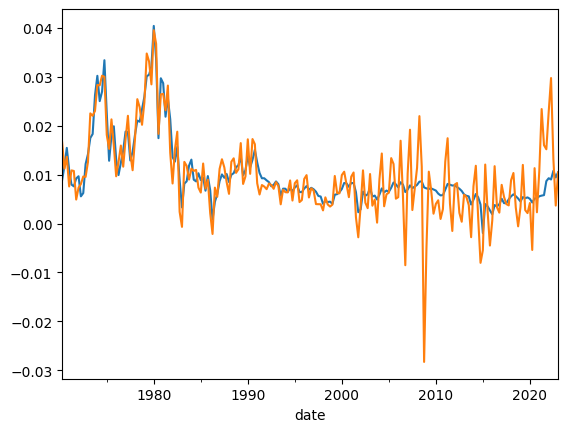

In [14]:
model.stored_state_means["etau"]["United States"].plot()
df_inflation.query("country == 'United States'").set_index("date")["inflation"].plot()

# 4. H-period ahead forecasting

In [15]:
df_inflation

,country,date,inflation
20,Netherlands,1970-04-01,0.014768
23,Germany,1970-04-01,0.008881
27,Belgium,1970-04-01,0.005236
28,United States,1970-04-01,0.016667
43,Germany,1970-07-01,0.001468
...,...,...,...
7377,United States,2022-10-01,0.003669
7388,United States,2023-01-01,0.010452
7392,Germany,2023-01-01,0.015273
7394,Belgium,2023-01-01,-0.003628


In [16]:
model.predict(df_inflation.query("date <= '2022-10-1'"))

,inflation,country,date
0,0.015150,Netherlands,2023-01-01
1,0.007453,Germany,2023-01-01
2,0.029280,Belgium,2023-01-01
3,0.011935,United States,2023-01-01


In [17]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

,inflation,country,date
0,0.008676,Netherlands,2010-01-01
1,0.005325,Germany,2010-01-01
2,0.008258,Belgium,2010-01-01
3,0.010072,United States,2010-01-01
4,-0.000465,Netherlands,2010-04-01
...,...,...,...
207,0.012504,United States,2022-10-01
208,0.015150,Netherlands,2023-01-01
209,0.007453,Germany,2023-01-01
210,0.029280,Belgium,2023-01-01


Text(0.5, 1.0, 'Forecasts, tau and actual inflation for the US')

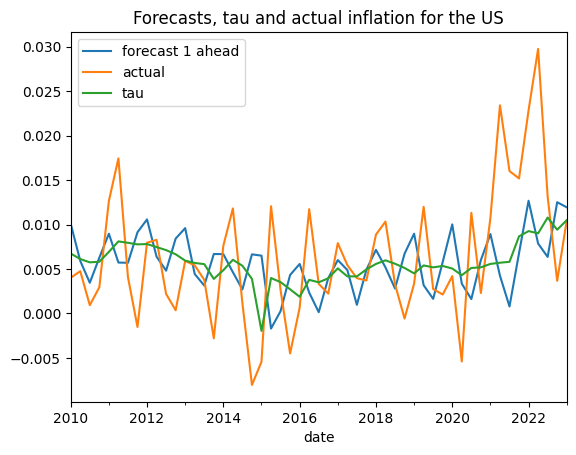

In [18]:
import matplotlib.pyplot as plt
forecast.query("country == 'United States'").set_index("date")['inflation'].plot(label = "forecast 1 ahead")
df_inflation.query("country == 'United States' and date >= '2010-01-01'").set_index("date")['inflation'].plot(label = "actual")
model.stored_state_means.loc["United States"].loc["2010-01-01":]["etau"].plot(label = "tau")
plt.legend()
plt.title("Forecasts, tau and actual inflation for the US")

Text(0.5, 1.0, 'Tau over time per country')

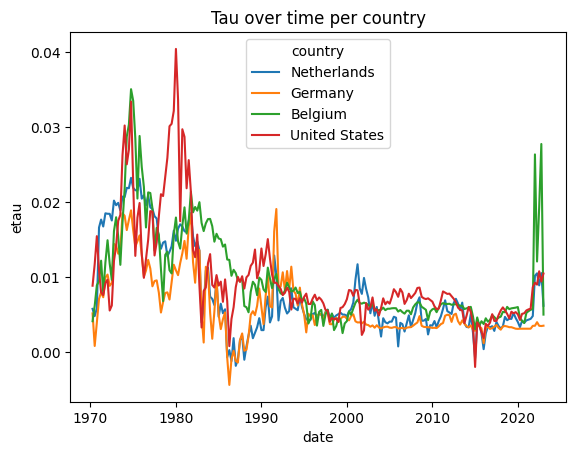

In [20]:
import seaborn as sns
sns.lineplot(
    data = model.stored_state_means["etau"].to_frame().reset_index(),
    x = "date",
    y = "etau",
    hue = "country"
)
plt.title("Tau over time per country")

<Axes: xlabel='date', ylabel='inflation'>

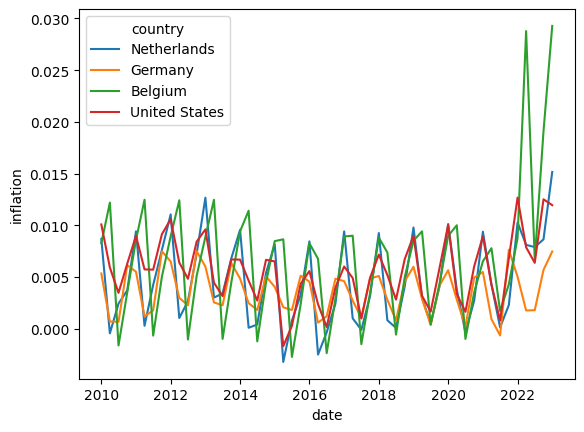

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "date",
    y = "inflation",
    hue = "country"
)
# turn off legend
# plt.legend().remove()

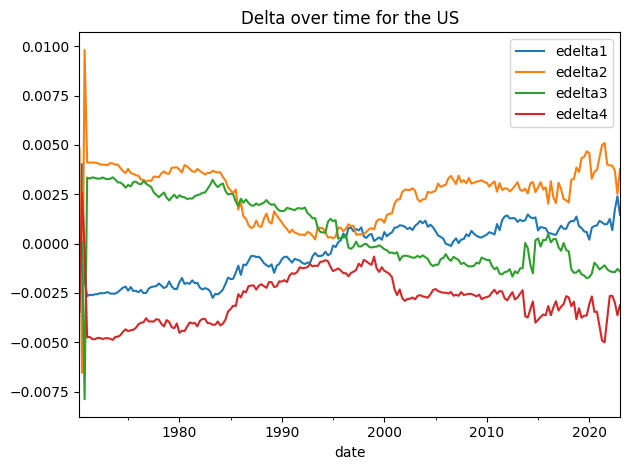

In [22]:
model.stored_state_means.loc["United States"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()
plt.title("Delta over time for the US")
plt.tight_layout()
plt.savefig("../../Figures/delta_over_time_mucsvss.png", dpi = 300)

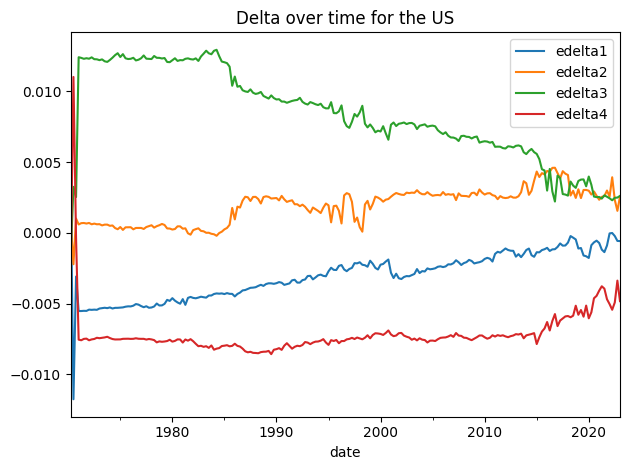

In [32]:
model.stored_state_means.loc["Belgium"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()
plt.title("Delta over time for the US")
plt.tight_layout()

# 5. Compare the forecast with the actual data

In [33]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,pred,country,date,actual
112,0.009399,Netherlands,2017-01-01,0.002811
113,0.004587,Germany,2017-01-01,0.001000
114,0.008910,Belgium,2017-01-01,0.011707
115,0.006001,United States,2017-01-01,0.007907
116,0.000983,Netherlands,2017-04-01,0.007003
...,...,...,...,...
207,0.012504,United States,2022-10-01,0.003669
208,0.015150,Netherlands,2023-01-01,-0.013667
209,0.007453,Germany,2023-01-01,0.015273
210,0.029280,Belgium,2023-01-01,-0.003628


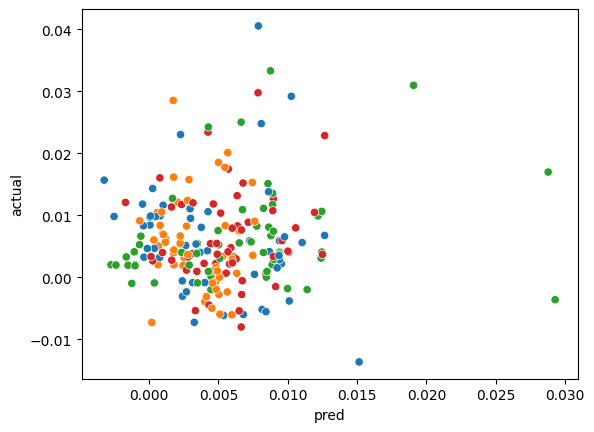

In [40]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "country"
)
plt.legend().remove()

In [41]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7865
Date:                Sat, 06 Apr 2024   Prob (F-statistic):              0.376
Time:                        14:41:36   Log-Likelihood:                 725.62
No. Observations:                 212   AIC:                            -1447.
Df Residuals:                     210   BIC:                            -1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.001      6.524      0.000       0.004       0.007
pred           0.1084      0.122      0.887      0.376      -0.133       0.349
==============================================================================
Omnibus:                       48.190   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.927
Skew:                           1.108   Prob(JB):                     2.44e-21
Kurtosis:                       5.415   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""